STEP1. 匯入資料集數據處理套件  
    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from imutils import paths
from keras.preprocessing.image import img_to_array
from keras.utils import np_utils, plot_model
import cv2
import os
from keras.models import *  
from keras.layers import *
import keras


STEP2. 匯入資料集  
1.imagePaths : 匯入chest X-Ray資料集，如果未來需要更改資料集，需要改後path.list_images(" ")中的路徑。  
2.IMAGE_DIMS = (300, 150, 3) : 此資料集中影像尺寸大小為300 * 150且為彩色圖像，未來如果需要更改資料集，需要更改此處的影像尺寸。  
3.第三、四行為初始化宣告。


In [ ]:
IMAGE_DIMS = (67, 155)
labels = []

# word_path = "C:\\Users\Red\\Desktop\\T_brain\\Dataset\\train_preprocess_filter_automatic"
#word_path = "C:\\Users\Red\\Desktop\\T_brain\\Dataset\\OK_padding"
#word_list = os.listdir(word_path)

class_num = 500

#imagePaths = sorted(list(paths.list_images(word_path)))
#data = np.zeros((len(imagePaths), IMAGE_DIMS[0], IMAGE_DIMS[1], 1))

STEP3. 整理資料集資料內容  
1.image : 將圖片轉為0~255的矩陣傳入data。  
2.labels : 將每張圖片所代表的類別傳入labels。  
3.如果未來需要新增資料集類別，需要對於類別標籤進行修改，可以對應自己的Datasets中資料夾名稱與位置順序修改程式碼。  


In [ ]:
# count = 0
# for word_num in range(0, len(word_list)):
#     image_loads = sorted(list(paths.list_images(word_path + "\\" + word_list[word_num] + "\\")))
#     for image_num in range(0, len(image_loads)):
#         image = cv2.imdecode(np.fromfile(image_loads[image_num], dtype=np.uint8), -1)
#         #image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
#         if len(image.shape) > 2:
#             image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#         image = img_to_array(image)
#         data[count] = image
#         labels.append(word_num)
#         count += 1

In [ ]:
# np.save("data.npy", data)
# np.save("labels", np.array(labels))

In [ ]:
data = np.load('/content/drive/MyDrive/Programming/T_brain/data.npy')
labels = np.load('/content/drive/MyDrive/Programming/T_brain/labels.npy')

### Padding Image, let all data have same dimension

In [ ]:
# path = "C:\\Users\\Red\\Desktop\\T_brain\\Dataset\\OK"
# word_dir = os.listdir(path)

# save_path = "C:\\Users\\Red\\Desktop\\T_brain\\Dataset\\OK_padding"
# for word in range(0, len(word_dir)):
#     if not os.path.exists(save_path + "\\" + word_dir[word]):
#         os.makedirs(save_path + "\\" + word_dir[word])

In [ ]:
# H_Big = 67  # 67
# W_Big = 155  # 155
# count = 0
# for word_num in range(0, len(word_list)): # 
#     image_loads = sorted(list(paths.list_images(word_path + "\\" + word_list[word_num] + "\\")))
#     for image_num in range(0, len(image_loads)):
#         image = cv2.imdecode(np.fromfile(image_loads[image_num], dtype=np.uint8), -1)
#         if len(image.shape) > 2:
#             image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#         if image.shape[0] < 67:
#             padding = np.ones(( (H_Big - image.shape[0]), image.shape[1]))*255
#             image = np.vstack((image, padding))
#         if image.shape[0] < 155:
#             padding = np.ones(( image.shape[0], (W_Big - image.shape[1])))*255
#             image = np.hstack((image, padding))
#         image = img_to_array(image)
#         cv2.imencode('.jpg', image)[1].tofile(image_loads[image_num].replace('\\OK\\', '\\OK_padding\\'))

STEP5. 將資料區分為Train、Test資料集  
1.左邊區塊 x_train, x_test : 將STEP.4正規化後的圖片資料區分為Train、Test資料。  
2.右邊區塊 y_train, y_test : 將STEP.4 labels資料區分為Train、Test資料。  
3.上述data、labels資料皆為乎相對應，以訓練資料為例 : x_train[0]圖片對應到y_train[0]標籤。  
4.test_size=0.3 : 將資料集切割為 Train: 70% ;Test: 30%。  


In [ ]:
# x_train, x_test = 將data分割為Train與Test 
# (test_size = 0.3) = 將資料集切割為 Train: 70% ;Test: 30%  
(x_train, x_test, y_train, y_test) = train_test_split(data, labels, test_size=0.1, stratify= labels)

STEP6. 卷積神經網路模型標籤資料前處理  
1.將資料集中的 labels(影像數字真實的值)內容進行one-hot encoding，才能符合Keras所要求的資料結構。  
2.由輸出可知我們查看的第一個Traing Labels的值為0。  
3.由輸出可知我們查看的第一個Traing Labels 進行one-hot encoding轉換後所在的陣列位置。  


In [ ]:
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [ ]:
### model1  resuidal block

kernel_size1 = (2, 2)
kernel_size2 = (3, 3)
kernel_size3 = (5, 5)
kernel_initializer = 'he_normal'
filters_1 = 32
filters_2 = 32

inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))  # 1

mg_conc = Concatenate()([inputs, inputs, inputs]) 

x = Conv2D(filters_1, (3, 3), use_bias=False,
                kernel_initializer=kernel_initializer)(mg_conc)
x = LeakyReLU(alpha=0.03)(x)

x = BatchNormalization()(x)
x = Conv2D(filters_2, (3, 3), use_bias=False,
                kernel_initializer=kernel_initializer)(x)
x = BatchNormalization()(x)
##### res_block start #####
# res_inputs = Input(shape=(x.shape[1].value, x.shape[2].value, x.shape[3].value))  # 1
x_res1 = Conv2D(filters_2, kernel_size1, padding='same',
           use_bias=False, kernel_initializer=kernel_initializer)(x)
x_res1 = BatchNormalization()(x_res1)
x_res1 = Activation('relu')(x_res1)
#x_res = Dropout(0.25)(x_res)
# --> 2nd layer
x_res1 = Conv2D(filters_2, kernel_size1,
           padding='same', use_bias=False,
           kernel_initializer=kernel_initializer)(x_res1)
x_res1 = Add()([x_res1, x])  # Sum skip connection and main connection
x_res1 = MaxPooling2D(pool_size=(2, 2))(x_res1)

###
# x_res2 = Conv2D(filters_2, kernel_size2, padding='same',
#            use_bias=False, kernel_initializer=kernel_initializer)(x_res1)
# x_res2 = BatchNormalization()(x_res2)
# x_res2 = Activation('relu')(x_res2)
# x_res2 = Conv2D(filters_2, kernel_size2,
#            padding='same', use_bias=False,
#            kernel_initializer=kernel_initializer)(x_res2)
# x_res2 = Add()([x_res2, x_res1])  # Sum skip connection and main connection
# x_res2 = MaxPooling2D(pool_size=(2, 2))(x_res2)

# ###
# x_res3 = Conv2D(filters_2, kernel_size3, padding='same',
#            use_bias=False, kernel_initializer=kernel_initializer)(x_res2)
# x_res3 = BatchNormalization()(x_res3)
# x_res3 = Activation('relu')(x_res3)
# x_res3 = Conv2D(filters_2, kernel_size3,
#            padding='same', use_bias=False,
#            kernel_initializer=kernel_initializer)(x_res3)
# x_res3 = Add()([x_res3, x_res2])  # Sum skip connection and main connection
# x_res3 = MaxPooling2D(pool_size=(2, 2))(x_res3)


fl = Flatten()(x_res1)
fl = Dense(512, activation='relu')(fl)
fl = Dense(512, activation='relu')(fl)
output = Dense(class_num, activation='softmax')(fl)
res_model = Model(inputs, output)
res_model.summary() 




Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 67, 155, 1)   0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 67, 155, 3)   0           input_1[0][0]                    
                                                                 input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 65, 153, 32)  864         concatenate_1[0][0]              
___________________________________________________________________________________________

In [ ]:
### model 2 vgg16

inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))  # 1
mg_conc = Concatenate()([inputs, inputs, inputs]) 
vgg16_model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_tensor=mg_conc)
fc = Flatten()(vgg16_model.layers[16].output)
fc = Dense(512, activation='relu')(fc)
fc = Dense(512, activation='relu')(fc)
output = Dense(class_num, activation='softmax')(fc)
res_model = Model(inputs, output)
res_model.trainable = True

res_model.summary() 

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 67, 155, 1)] 0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 67, 155, 3)   0           input_1[0][0]                    
                                                                 input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 67, 155, 64)  1792        concatenate[0][0]                
______________________________________________________________________________________________

In [ ]:
inputs = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]))  # 1
mg_conc = Concatenate()([inputs, inputs, inputs]) 
base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_tensor=mg_conc)
fc = Flatten()(base_model.layers[38].output)
fc = Dense(512, activation='relu')(fc)
fc = Dense(512, activation='relu')(fc)
output = Dense(class_num, activation='softmax')(fc)
res_model = Model(inputs, output)
res_model.trainable = True

res_model.summary() 

c:\users\red\appdata\local\programs\python\python37\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 34, 34, 1)    0                                            
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 34, 34, 3)    0           input_3[0][0]                    
                                                                 input_3[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 40, 40, 3)    0           concatenate_3[0][0]              
____________________________________________________________________________________________

STEP 8. 定義訓練方式與訓練模型    
1.第六行訓練方法參數設定  
loss : 深度學習通常使用'cross_entropy'交叉熵訓練效果較好。  
optimizer : 設定訓練時的優化方法，深度學習中使用'adam'可讓訓練更快收斂，並提高準確率。  
metrics : 設定評估模型的方法是'accuracy' (準確率)。  
2.第七行訓練模型參數設定  
x : Step6. 進行前處理後的訓練資料集。  
y : Step7. 進行one-hot encoding後的標籤資料。  
validation_split = 0.2 : 用於沒有提供驗證集時，將訓練資料集取出20%當作驗證資料集。  
epochs = 5 : 把所有訓練數據完整的訓練過5次。  
batch_size = 50 : 假設有訓練資料有100筆，將資料集每等份區分為10筆，所以總共區分了10等份。  
verbose = 1 : 訓練紀錄顯示，0為不輸出訓練進度紀錄，1為輸出進度條紀錄，2為每個epoch輸出一行記錄。  


In [ ]:
#在訓練模型之前, 我們必須先使用 compile 方法
# loss : 設定 loss function, 深度學習通常使用'cross_entropy'交叉熵訓練效果較好.
# optimizer : 設定訓練時的優化方法，深度學習中使用'adam'可讓訓練更快收斂，並提高準確率
# metrics : 設定評估模型的方式是 accuracy (準確率)
# 定義訓練方式 
from keras.optimizers import Adam, SGD
opt = Adam(lr=0.0001)

res_model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
train_history = res_model.fit(x = x_train, 
                              y = y_train_onehot,
                              validation_data=(x_test, y_test_onehot),
                              epochs=30, 
                              batch_size=200, 
                              verbose=1)

Epoch 1/30
163/163 [==============================] - 143s 605ms/step - loss: 14.7901 - accuracy: 0.0029 - val_loss: 6.0313 - val_accuracy: 0.0108
Epoch 2/30
163/163 [==============================] - 85s 523ms/step - loss: 5.7684 - accuracy: 0.0216 - val_loss: 4.6726 - val_accuracy: 0.0983
Epoch 3/30
163/163 [==============================] - 85s 525ms/step - loss: 3.9070 - accuracy: 0.1964 - val_loss: 2.8665 - val_accuracy: 0.3616
Epoch 4/30
163/163 [==============================] - 86s 525ms/step - loss: 2.1388 - accuracy: 0.4997 - val_loss: 1.9558 - val_accuracy: 0.5492
Epoch 5/30
163/163 [==============================] - 86s 525ms/step - loss: 1.1762 - accuracy: 0.7125 - val_loss: 1.6005 - val_accuracy: 0.6376
Epoch 6/30
163/163 [==============================] - 86s 525ms/step - loss: 0.6709 - accuracy: 0.8326 - val_loss: 1.5144 - val_accuracy: 0.6680
Epoch 7/30
163/163 [==============================] - 86s 526ms/step - loss: 0.3998 - accuracy: 0.8967 - val_loss: 1.5382 - val_

In [ ]:
# del res_model

STEP 9. 儲存(STEP 8. )訓練好的模型 
1.將已訓練好的模型儲存，並命名為'CNN_XRaymodel.h5'儲存至工作資料夾下。  


In [ ]:
res_model.save('model.h5')

STEP10. 大量測試卷積神經網路架構  
1.如果需要利用同一組資料集，但是想要嘗試不同網路架構組合得出不同的訓練、驗證準確率。  
2.我們只要訓練完一次模型，如果對於模型結果不滿意，我們可以利用 del model 將現有訓練模型結果刪除，但是不刪除先前步驟所讀入的資料集與資料集前處理。  
因為怕練習時不小心刪除之前所訓練之模型，我們先將其方法註解，如果要使用時，我們將 #del model最前方的 # 刪除( 等同於取消註解)。  


In [ ]:
# del model

STEP11. 建立 show_train_history function 顯示訓練過程   
1.第十四行為顯示STEP7. 模型訓練的正確率(accuracy)。  
2.第十六行為顯示STEP7. 模型訓練時的損失函數(loss)結果，且希望loss結果越低越好。  


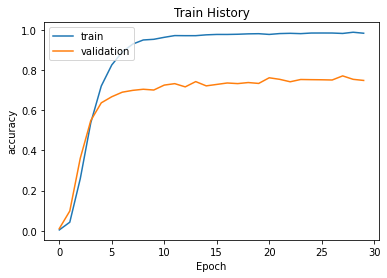

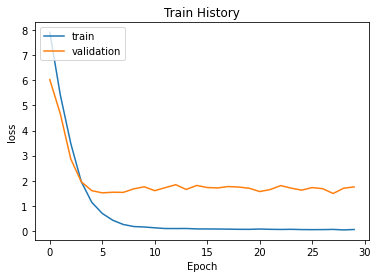

In [ ]:
# 訓練步驟會將每一個訓練週期的 accuracy 與 loss 記錄在 train_history 變數. 
# 我們可以使用下面程式碼讀取 train_history 以圖表顯示訓練過程:
import matplotlib.pyplot as plt  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 
# 1. 圖表顯示 accuracy
show_train_history(train_history, 'accuracy', 'val_accuracy')
# 2. 圖表顯示 loss
show_train_history(train_history, 'loss', 'val_loss')

STEP 12. 使用測試資料評估模型準確率與預測  
1.利用keras所提供的model.evaluate()函數對於測試資料進行預測。  
2.x_test : 為STEP6. 透過前處理過後的測試資料。  
3.y_test_onehot : 為STEP7. 透過one-hot encoding前處理過後的標籤資料。  


In [ ]:
scores = res_model.evaluate(x_test, y_test_onehot)  
print("")  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

114/114 [==============================] - 6s 33ms/step - loss: 1.7502 - accuracy: 0.7492

	[Info] Accuracy of testing data = 74.9%


STEP 13. 查看混淆矩陣(confusion matrix)結果  
1.第三行利用keras所提供的預測函數model.predict_classes()，將x_test_reshape測試資料集輸入進行測試，並將其預測標籤結果傳入prediction。  
2.第四行將STEP5. 讀入的y_test (正確標籤答案)與前一步驟預測出來的標籤結果建立出混淆矩陣。  


In [ ]:
import pandas as pd

predict = res_model.predict(x_test)
predict=np.argmax(predict,axis=1)
Confusion_matrix = pd.crosstab(y_test, predict, rownames= ['labels'], colnames=['predict'])
# print("0: NORMAL; 1: PNEUMONIA")
Confusion_matrix

predict,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,497,498,499
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0
496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,7,0,0


In [ ]:
df = pd.DataFrame(Confusion_matrix)
df.to_csv('/content/Confusion_matrix.csv')

Step14. 查看多筆(10筆)預測結果資料  
1. 我們將使用此模型進行預測。  
2. 此function協助我們一次顯示10筆預測結果。  


	[Info] Making prediction to x_Test_norm

[ 99 361 246 130 241 491 387 113 161 143]



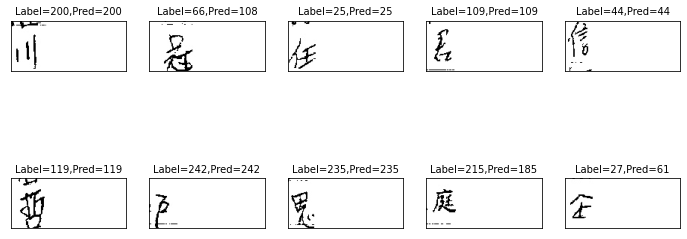

In [ ]:
import matplotlib.pyplot as plt  

def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx][:,:,0], cmap='gray')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "Label={},Pred={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "Label={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  
    
print("\t[Info] Making prediction to x_Test_norm")  
predict = res_model.predict(x_test)
predict = np.argmax(predict,axis=1)
print("")  
print("%s\n" % (predict[50:60]))  
plot_images_labels_predict(x_test, y_test, predict, idx=130)